# Customer churn prediction for a telecommunications company

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.drop(columns=['customerID', 'gender', 'SeniorCitizen', 'PaperlessBilling'], axis=1, inplace=True)

In [7]:
df.shape

(7043, 17)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [9]:
df.describe(include='object').T

,count,unique,top,freq
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473
StreamingTV,7043,3,No,2810


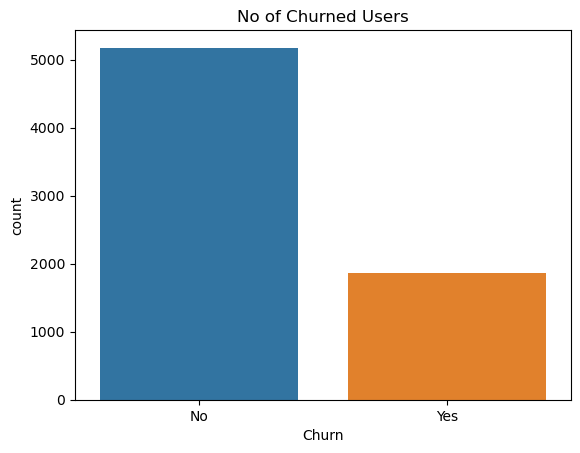

In [12]:
# How many users churned?

plt.figure()
sns.countplot(x='Churn', data=df)

plt.title('No of Churned Users');

Text(0.5, 1.0, 'Tenure vs Churn')

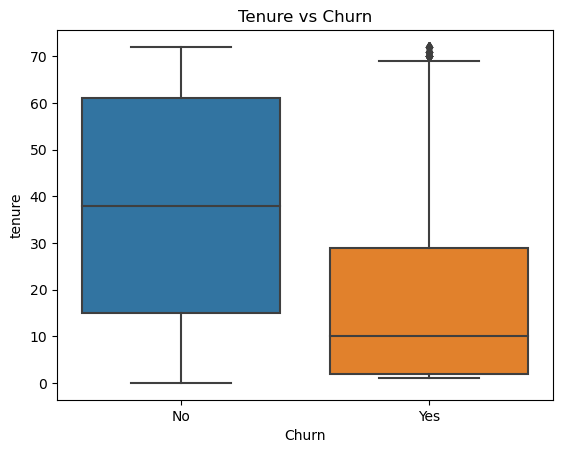

In [141]:
# Tenure vs Churn

sns.boxplot(x='Churn', y='tenure', data=df); # Short-tenure customers churned
plt.title('Tenure vs Churn')

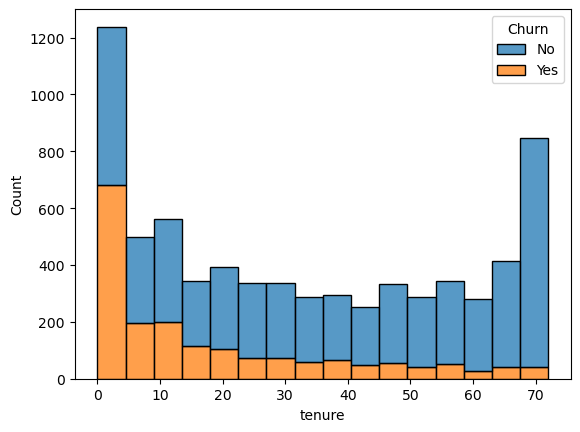

In [161]:
sns.histplot(x='tenure', hue='Churn', data=df, multiple='stack');

# Customers with shorter tenure are more likely to churn
# The likelihood of churn decreases with increase in tenure

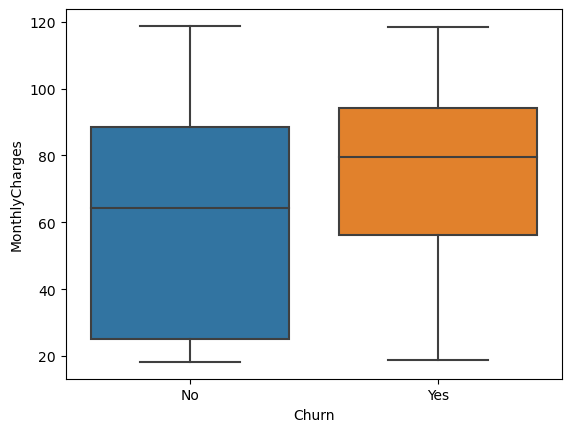

In [142]:
# Monthly charges vs Churn

sns.boxplot(x='Churn', y='MonthlyCharges', data=df);

In [ ]:
# Customers who churned tend to have higher monthly charges than those who didnt.
# The median charge of those who churned is higher than those who non-churners

<Axes: xlabel='Contract', ylabel='count'>

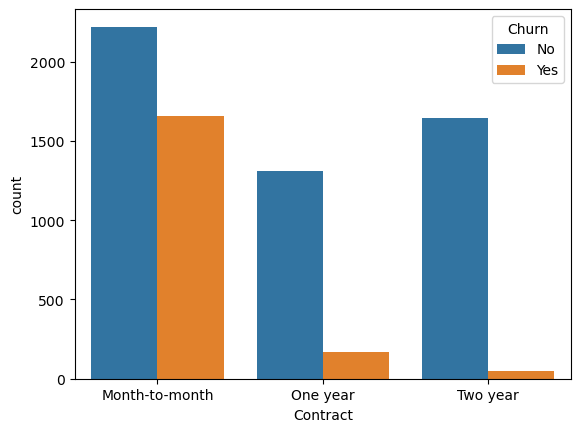

In [130]:
sns.countplot(x='Contract', hue='Churn', data=df)

In [131]:
# Customers with m-to-m contracts are most likely to churn
# Longer contracts have lower churn rates

<Axes: xlabel='InternetService', ylabel='count'>

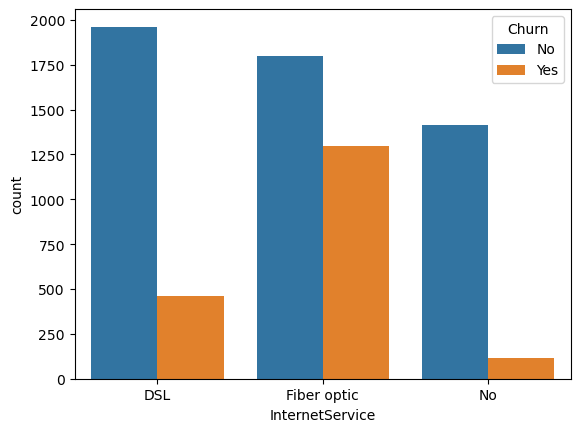

In [133]:
sns.countplot(x='InternetService', hue='Churn', data=df)

In [ ]:
# Users using the Fibre Optic service tend to have higher churn rates

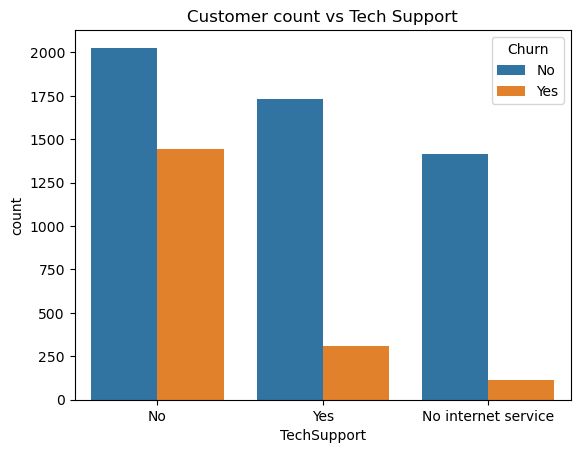

In [139]:
plt.title('Customer count vs Tech Support');
sns.countplot(x='TechSupport', hue='Churn', data=df);

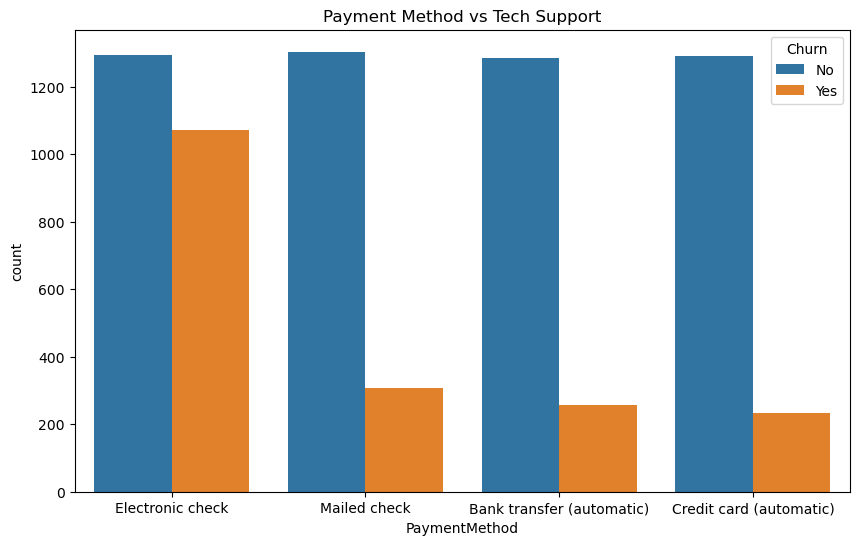

In [148]:
plt.figure(figsize=(10, 6))
plt.title('Payment Method vs Tech Support');
sns.countplot(x='PaymentMethod', hue='Churn', data=df);

In [ ]:
# Customers using the Electronic Check payment method are more likely to churn

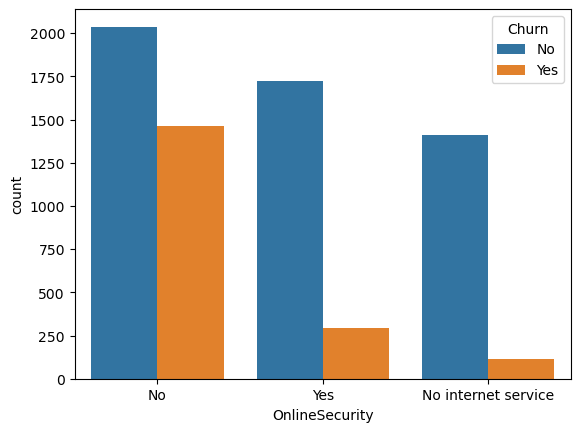

In [153]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=df);

In [ ]:
# Customers with no online security are most likely to churn

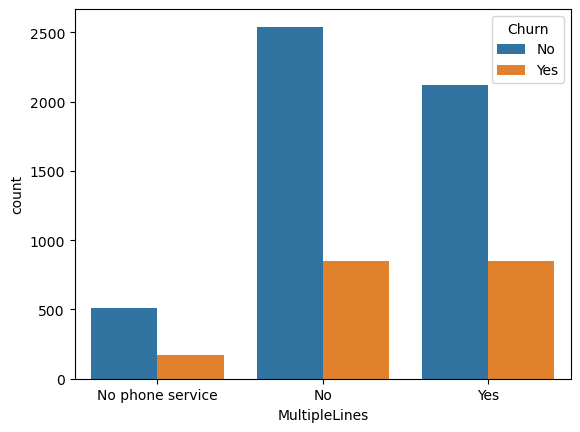

In [154]:
sns.countplot(x='MultipleLines', hue='Churn', data=df);

In [ ]:
# Having multiple lines had no effect on customers to churn

In [22]:
df.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.5,No
2,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes
